In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [5]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [8]:
model = keras.models.Sequential()

# 面积变小但通道总数变大了
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[28,28,1]))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)        

In [11]:
logdir = './cnn-relu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 184s 3ms/sample - loss: 0.7832 - accuracy: 0.7201 - val_loss: 0.4508 - val_accuracy: 0.8420
Epoch 2/10
55000/55000 [==============================] - 180s 3ms/sample - loss: 0.4092 - accuracy: 0.8502 - val_loss: 0.3618 - val_accuracy: 0.8674
Epoch 3/10
55000/55000 [==============================] - 182s 3ms/sample - loss: 0.3464 - accuracy: 0.8727 - val_loss: 0.3121 - val_accuracy: 0.8860
Epoch 4/10
55000/55000 [==============================] - 194s 4ms/sample - loss: 0.3108 - accuracy: 0.8867 - val_loss: 0.3459 - val_accuracy: 0.8712
Epoch 5/10
55000/55000 [==============================] - 261s 5ms/sample - loss: 0.2848 - accuracy: 0.8959 - val_loss: 0.2954 - val_accuracy: 0.8920
Epoch 6/10
55000/55000 [==============================] - 231s 4ms/sample - loss: 0.2658 - accuracy: 0.9028 - val_loss: 0.2741 - val_accuracy: 0.8990
Epoch 7/10
55000/55000 [===========================

In [12]:
model.evaluate(x_test_scaled, y_test, verbose = 0)

[0.2639241564631462, 0.9055]

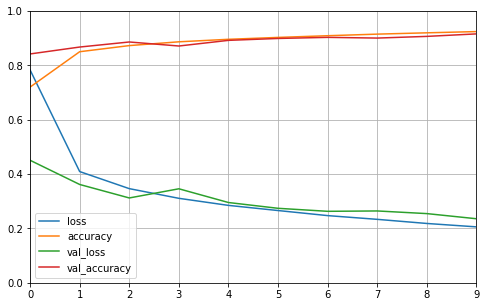

In [13]:
plot_learning_curves(history)

# 深度可分离卷积神经网络


In [14]:

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='selu',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
model.summary()

In [15]:
logdir = './separable-cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 504s 9ms/sample - loss: 2.3030 - accuracy: 0.1021 - val_loss: 2.3033 - val_accuracy: 0.0986
Epoch 2/10
55000/55000 [==============================] - 488s 9ms/sample - loss: 2.3014 - accuracy: 0.1081 - val_loss: 2.2988 - val_accuracy: 0.1828
Epoch 3/10
55000/55000 [==============================] - 463s 8ms/sample - loss: 1.4566 - accuracy: 0.4813 - val_loss: 0.7845 - val_accuracy: 0.6950
Epoch 4/10
55000/55000 [==============================] - 456s 8ms/sample - loss: 0.7040 - accuracy: 0.7372 - val_loss: 0.6483 - val_accuracy: 0.7672
Epoch 5/10
55000/55000 [==============================] - 513s 9ms/sample - loss: 0.5953 - accuracy: 0.7791 - val_loss: 0.5471 - val_accuracy: 0.8006
Epoch 6/10
27744/55000 [==============>...............] - ETA: 4:12 - loss: 0.5473 - accuracy: 0.7969

KeyboardInterrupt: 

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled, y_test, verbose = 0)
